# importing the  libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# importing the training dataset

In [2]:
data = pd.read_csv('minor2.csv')

In [3]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Preprocessing the Dataset

In [6]:
data.isnull().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

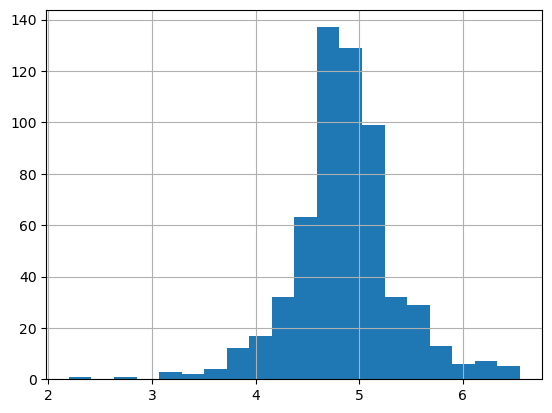

In [7]:
data['loanAmount_log']= np.log(data['LoanAmount']) ## normalising the loan amount and visualizing
data['loanAmount_log'].hist(bins=20)

<AxesSubplot:>

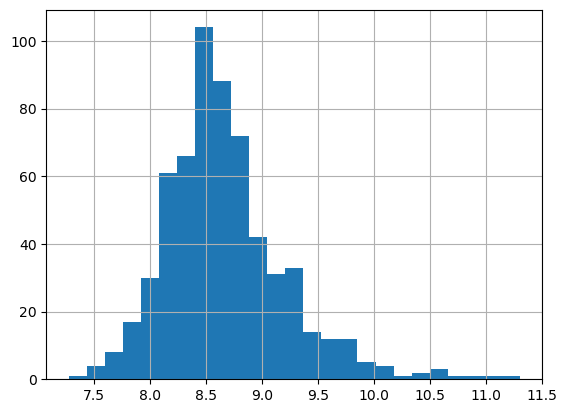

In [8]:
data['totalincome']=data['ApplicantIncome']+data['CoapplicantIncome']  ## making the new attributes
data['totalincome']=np.log(data['totalincome'])  #normalising the new attributes and normalisin g
data['totalincome'].hist(bins=25)

# Handling the null values present in dataset

In [9]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace= True)

In [10]:
data['Married'].fillna(data['Married'].mode()[0], inplace= True)

In [11]:
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace= True)

In [12]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace= True)

In [13]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace= True)

In [14]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace= True)

In [15]:
data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.mean())
data.loanAmount_log = data.loanAmount_log.fillna(data.loanAmount_log.mean())

In [16]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
totalincome          0
dtype: int64

In [17]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loanAmount_log,totalincome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,8.699515
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,5.587249,9.170872
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y,4.553877,8.255569
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N,5.062595,8.619750
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y,5.123964,8.618305
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N,5.855072,10.077819


# Exoloratory the Data Analysis

Number of people who take loan as group by gender
Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

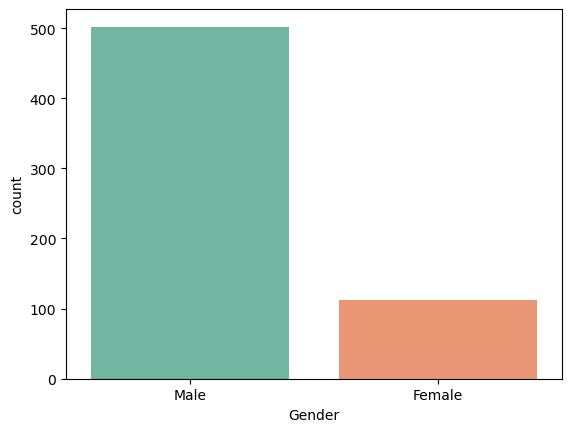

In [18]:
print("Number of people who take loan as group by gender")
print(data['Gender'].value_counts())
sns.countplot(data=data, x="Gender", palette='Set2')

Number of people who take loan as group by Married
Yes    401
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

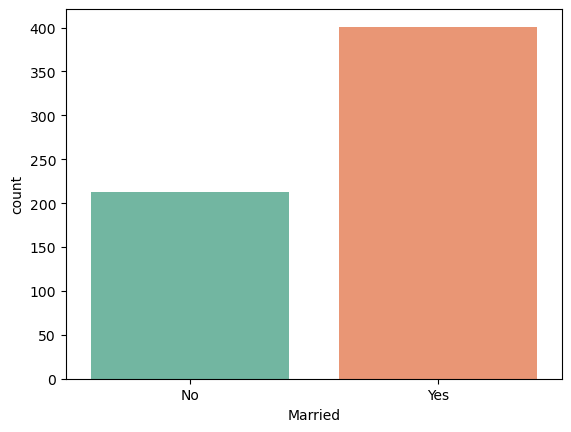

In [19]:
print("Number of people who take loan as group by Married")
print(data['Married'].value_counts())
sns.countplot(data=data, x="Married", palette='Set2')

Number of people who take loan as group by Self_Employed
No     532
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

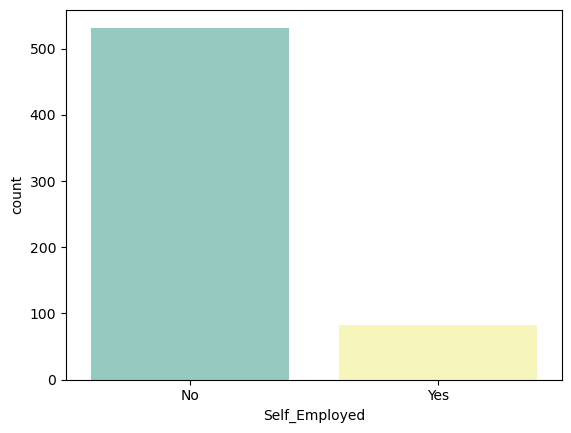

In [20]:
print("Number of people who take loan as group by Self_Employed")
print(data['Self_Employed'].value_counts())
sns.countplot(data=data, x="Self_Employed", palette='Set3')

Number of people who take loan as group by Credit_History
1.0    525
0.0     89
Name: Credit_History, dtype: int64


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

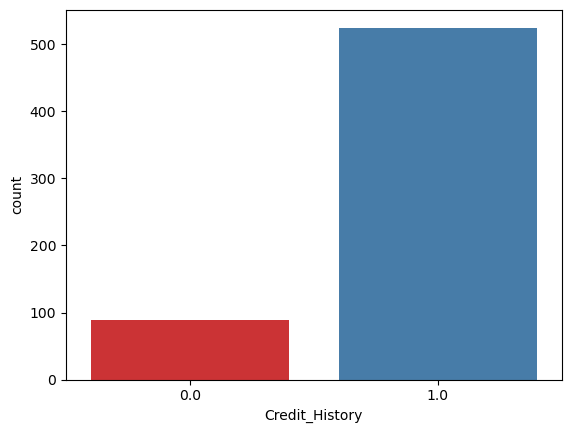

In [21]:
print("Number of people who take loan as group by Credit_History")
print(data['Credit_History'].value_counts())
sns.countplot(data=data, x="Credit_History", palette='Set1')

# Dividing the dataset into dependent and independent set

In [22]:
x = data.iloc[:,np.r_[1:5,9:11,13:15]].values # x have independent dataset
y = data.iloc[:,12].values # y have dependent dataset

In [23]:
x

array([['Male', 'No', '0', ..., 1.0, 4.857444178729353,
        8.674025985443025],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617,
        8.714567550836485],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425,
        8.006367567650246],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752,
        9.025455532779063],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587,
        8.933664178700935],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754,
        8.430109084509125]], dtype=object)

In [24]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

# Label Encoding

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


from sklearn.preprocessing import LabelEncoder
labelEncoder_x= LabelEncoder()

In [26]:
for i in range(0, 5):
    X_train[:,i]= labelEncoder_x.fit_transform(X_train[:,i])
    X_train[:,7]= labelEncoder_x.fit_transform(X_train[:,7])
    
    
X_train    

array([[1, 1, 1, ..., 1.0, 3.784189633918261, 235],
       [1, 0, 0, ..., 1.0, 4.836281906951478, 155],
       [1, 0, 2, ..., 1.0, 5.087596335232384, 372],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 343],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 258],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 285]], dtype=object)

In [27]:
labelEncoder_y= LabelEncoder()
y_train = labelEncoder_y.fit_transform(y_train)

y_train

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,

# testing

In [28]:
for i in range(0, 5):
    X_test[:,i]= labelEncoder_x.fit_transform(X_test[:,i])
    X_test[:,7]= labelEncoder_x.fit_transform(X_test[:,7])
    
    
X_test 

array([[1, 0, 0, ..., 1.0, 4.430816798843313, 105],
       [0, 0, 0, ..., 1.0, 4.718498871295094, 38],
       [1, 1, 0, ..., 1.0, 5.780743515792329, 127],
       ...,
       [1, 1, 0, ..., 1.0, 4.912654885736052, 132],
       [1, 0, 0, ..., 1.0, 4.882801922586371, 83],
       [1, 1, 1, ..., 0.0, 4.795790545596741, 44]], dtype=object)

In [29]:
labelEncoder_y= LabelEncoder()
y_test = labelEncoder_y.fit_transform(y_test)

y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

# Standardize features by removing the mean and scaling to unit variance.

In [30]:
from sklearn.preprocessing import StandardScaler

SS= StandardScaler()
X_train =SS.fit_transform(X_train)
X_test =SS.fit_transform(X_test)


# TO find which classifier is best for the prediction by accuracy

# Using RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf_clasifier= RandomForestClassifier()
rf_clasifier.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
y_pred= rf_clasifier.predict(X_test)

print("ACCORDING TO RANDOM FOREST PREDICTION PERCENTAGE IS ", metrics.accuracy_score(y_pred, y_test))
y_pred


ACCORDING TO RANDOM FOREST PREDICTION PERCENTAGE IS  0.8116883116883117


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

 # Using the Naive bayes classifier

In [33]:
from sklearn.naive_bayes import GaussianNB
NB_CLF= GaussianNB()
NB_CLF.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred= NB_CLF.predict(X_test)

print("ACCORDING TO GaussianNB PREDICTION PERCENTAGE IS ", metrics.accuracy_score(y_pred, y_test))
y_pred


ACCORDING TO GaussianNB PREDICTION PERCENTAGE IS  0.8311688311688312


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

# Using the Decission tree classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

DT_CLSIFIER= DecisionTreeClassifier()
DT_CLSIFIER.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
y_pred= DT_CLSIFIER.predict(X_test)

print("ACCORDING TO DecisionTreeClassifier, PREDICTION PERCENTAGE IS ", metrics.accuracy_score(y_pred, y_test))
y_pred

ACCORDING TO DecisionTreeClassifier, PREDICTION PERCENTAGE IS  0.6428571428571429


array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

 #  Using the KNeighborsClassifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier
KN_CLSIFIER= KNeighborsClassifier()
KN_CLSIFIER.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
y_pred= KN_CLSIFIER.predict(X_test)

print("ACCORDING TO KNeighborsClassifier, PREDICTION PERCENTAGE IS ", metrics.accuracy_score(y_pred, y_test))

y_pred

ACCORDING TO KNeighborsClassifier, PREDICTION PERCENTAGE IS  0.8116883116883117


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

# Using the SVM classifier

In [39]:
from sklearn.svm import SVC
SCV_clf = SVC()
SCV_clf.fit(X_train, y_train)

SVC()

In [40]:
y_pred= SCV_clf.predict(X_test)

print("ACCORDING TO SVC classifier, PREDICTION PERCENTAGE IS ", metrics.accuracy_score(y_pred, y_test))

y_pred

ACCORDING TO SVC classifier, PREDICTION PERCENTAGE IS  0.8311688311688312


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [41]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred= lr_classifier.predict(X_test)

print("ACCORDING TO LogisticRegression, PREDICTION PERCENTAGE IS ", metrics.accuracy_score(y_pred, y_test))

y_pred

ACCORDING TO LogisticRegression, PREDICTION PERCENTAGE IS  0.8311688311688312


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

# After using the various classifier, the SVC classifier has the best accuracy of the prediction with 83.1%

# Importing the Testing data  AND Preprocessing it

In [43]:
dfd = pd.read_csv('minor1.csv')

In [44]:
dfd

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [45]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [46]:
dfd.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [47]:
dfd.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# Handling the null values present in dataset

In [48]:
dfd['Gender'].fillna(dfd['Gender'].mode()[0], inplace= True)
dfd['Married'].fillna(dfd['Married'].mode()[0], inplace= True)
dfd['Dependents'].fillna(dfd['Dependents'].mode()[0], inplace= True)
dfd['Self_Employed'].fillna(dfd['Self_Employed'].mode()[0], inplace= True)
dfd['Loan_Amount_Term'].fillna(dfd['Loan_Amount_Term'].mode()[0], inplace= True)
dfd['Credit_History'].fillna(dfd['Credit_History'].mode()[0], inplace= True)


<AxesSubplot:>

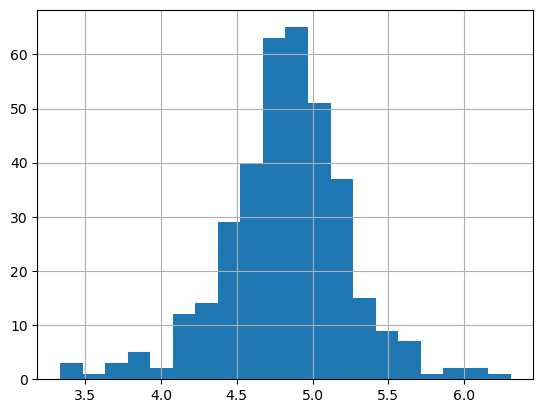

In [49]:
dfd['loanAmount_log']= np.log(dfd['LoanAmount'])
dfd['loanAmount_log'].hist(bins=20)

In [50]:
dfd.LoanAmount = dfd.LoanAmount.fillna(dfd.LoanAmount.mean())

In [51]:
dfd['totalincome']=dfd['ApplicantIncome']+dfd['CoapplicantIncome']
dfd['totalincome_log']=np.log(dfd['totalincome'])

In [52]:
dfd.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
loanAmount_log       5
totalincome          0
totalincome_log      0
dtype: int64

In [53]:
dfd.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,loanAmount_log,totalincome,totalincome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,5.023881,5587,8.628198
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban,4.077537,2226,7.707962
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,4.990433,3881,8.263848
8,LP001059,Male,Yes,2,Graduate,No,13633,0,280.0,240.0,1.0,Urban,5.634790,13633,9.520249
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban,4.812184,4800,8.476371


# Divinding the dataset into dependent and independent dataset



In [54]:
test_x = data.iloc[:,np.r_[1:5,9:11,13:15]].values # x have independent dataset
test_y = data.iloc[:,12].values # y have dependent dataset

# LABEL ENCODING 

In [55]:
for i in range(0, 5):
    test_x[:,i]= labelEncoder_x.fit_transform(test_x[:,i])
    test_x[:,7]= labelEncoder_x.fit_transform(test_x[:,7])
    
    
test_x

array([[1, 0, 0, ..., 1.0, 4.857444178729353, 320],
       [1, 1, 1, ..., 1.0, 4.852030263919617, 333],
       [1, 1, 0, ..., 1.0, 4.189654742026425, 42],
       ...,
       [1, 1, 1, ..., 1.0, 5.53338948872752, 436],
       [1, 1, 2, ..., 1.0, 5.231108616854587, 416],
       [0, 0, 0, ..., 0.0, 4.890349128221754, 185]], dtype=object)

In [56]:
test_y = labelEncoder_y.fit_transform(test_y)

In [57]:
test_x=SS.fit_transform(test_x)

# USING THE BEST ALGORITHM WHICH I GOT FROM THE TRAINING DATASET TO PREDICT THE RESULT

In [58]:
Y_pred= SCV_clf.predict(test_x)

print("ACCORDING TO SVC classifier, PREDICTION PERCENTAGE IS ", metrics.accuracy_score(Y_pred, test_y))

Y_pred

ACCORDING TO SVC classifier, PREDICTION PERCENTAGE IS  0.8159609120521173


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

# 1 predict that loan can approved
# 0 predict loan can not approved